# Boston House Prediction

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler # preprocessing

### Load the dataset from Tensorflow

In [2]:
# i will use tuple to access split the dataset directly from the keras library

(train_data,train_targets), (test_data, test_targets) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=42
)



In [3]:
# checking the shape of the train data
train_data.shape, train_targets.shape

((404, 13), (404,))

In [4]:
# checking the shape of the test data
test_data.shape, test_targets.shape

((102, 13), (102,))

In [5]:
train_data

array([[9.1780e-02, 0.0000e+00, 4.0500e+00, ..., 1.6600e+01, 3.9550e+02,
        9.0400e+00],
       [5.6440e-02, 4.0000e+01, 6.4100e+00, ..., 1.7600e+01, 3.9690e+02,
        3.5300e+00],
       [1.0574e-01, 0.0000e+00, 2.7740e+01, ..., 2.0100e+01, 3.9011e+02,
        1.8070e+01],
       ...,
       [3.0410e-02, 0.0000e+00, 5.1900e+00, ..., 2.0200e+01, 3.9481e+02,
        1.0560e+01],
       [5.2058e-01, 0.0000e+00, 6.2000e+00, ..., 1.7400e+01, 3.8845e+02,
        9.5400e+00],
       [2.5199e-01, 0.0000e+00, 1.0590e+01, ..., 1.8600e+01, 3.8943e+02,
        1.8060e+01]])

In [6]:
test_data

array([[2.17190e-01, 0.00000e+00, 1.05900e+01, ..., 1.86000e+01,
        3.90940e+02, 1.60300e+01],
       [1.29320e-01, 0.00000e+00, 1.39200e+01, ..., 1.60000e+01,
        3.96900e+02, 6.27000e+00],
       [6.65492e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 1.39900e+01],
       ...,
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [1.11604e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        1.09850e+02, 2.32700e+01],
       [2.28760e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        7.08000e+01, 1.06300e+01]])



*train_data has 13 features and 404 rows*

### Normalising the dataset
Since Neural Netwoek prefer normalised data i will normalise the data for better performance using the MinMaxScaler()

In [7]:
# instantiating the MinMaxScaler
scaler = MinMaxScaler()

# fitting only on the train data to avoid information leakage
scaler.fit_transform(train_data)

# Transformimng on both the the train and test daata
train_data_scaled = scaler.transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [8]:
train_data_scaled

array([[9.60549795e-04, 0.00000000e+00, 1.31598240e-01, ...,
        4.25531915e-01, 9.96469817e-01, 1.97503467e-01],
       [5.63336716e-04, 4.00000000e-01, 2.18108504e-01, ...,
        5.31914894e-01, 1.00000000e+00, 4.46601942e-02],
       [1.11745683e-03, 0.00000000e+00, 1.00000000e+00, ...,
        7.97872340e-01, 9.82878612e-01, 4.47988904e-01],
       ...,
       [2.70765792e-04, 0.00000000e+00, 1.73387097e-01, ...,
        8.08510638e-01, 9.94729941e-01, 2.39667129e-01],
       [5.78015841e-03, 0.00000000e+00, 2.10410557e-01, ...,
        5.10638298e-01, 9.78692824e-01, 2.11373093e-01],
       [2.76127157e-03, 0.00000000e+00, 3.71334311e-01, ...,
        6.38297872e-01, 9.81163952e-01, 4.47711512e-01]])

In [9]:
test_data_scaled

array([[2.37012796e-03, 0.00000000e+00, 3.71334311e-01, ...,
        6.38297872e-01, 9.84971506e-01, 3.91400832e-01],
       [1.38249034e-03, 0.00000000e+00, 4.93401760e-01, ...,
        3.61702128e-01, 1.00000000e+00, 1.20665742e-01],
       [7.47286610e-02, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 1.00000000e+00, 3.34812760e-01],
       ...,
       [9.76735048e-05, 8.00000000e-01, 5.68181818e-02, ...,
        4.68085106e-01, 9.84971506e-01, 1.12898752e-01],
       [1.25369170e-01, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 2.76186394e-01, 5.92233010e-01],
       [2.50017197e-03, 0.00000000e+00, 2.96920821e-01, ...,
        8.82978723e-01, 1.77719502e-01, 2.41608877e-01]])

# Building a Neural Network model

#### Model 1

In [10]:
# setting random seed
tf.random.set_seed(42)

# building a very simple model and will improve as we go
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# Compile the model

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4 * 10 **(epochs/20))


# fit the model

history_1 = model_1 .fit(train_data_scaled,
             train_targets,
             epochs=35,
             callbacks=[lr_scheduler],
             validation_split=0.1) # using 10% of the train data for validation to ensure improvement

Epoch 1/35
12/12 [==============================] - 3s 91ms/step - loss: 21.8840 - mae: 21.8840 - val_loss: 22.5995 - val_mae: 22.5995 - lr: 1.0000e-04
Epoch 2/35
12/12 [==============================] - 0s 21ms/step - loss: 21.8764 - mae: 21.8764 - val_loss: 22.5914 - val_mae: 22.5914 - lr: 1.1220e-04
Epoch 3/35
12/12 [==============================] - 0s 16ms/step - loss: 21.8679 - mae: 21.8679 - val_loss: 22.5825 - val_mae: 22.5825 - lr: 1.2589e-04
Epoch 4/35
12/12 [==============================] - 0s 13ms/step - loss: 21.8584 - mae: 21.8584 - val_loss: 22.5723 - val_mae: 22.5723 - lr: 1.4125e-04
Epoch 5/35
12/12 [==============================] - 0s 13ms/step - loss: 21.8477 - mae: 21.8477 - val_loss: 22.5609 - val_mae: 22.5609 - lr: 1.5849e-04
Epoch 6/35
12/12 [==============================] - 0s 13ms/step - loss: 21.8357 - mae: 21.8357 - val_loss: 22.5482 - val_mae: 22.5482 - lr: 1.7783e-04
Epoch 7/35
12/12 [==============================] - 0s 13ms/step - loss: 21.8222 - mae: 

Text(0.5, 1.0, 'Loss curve model 1')

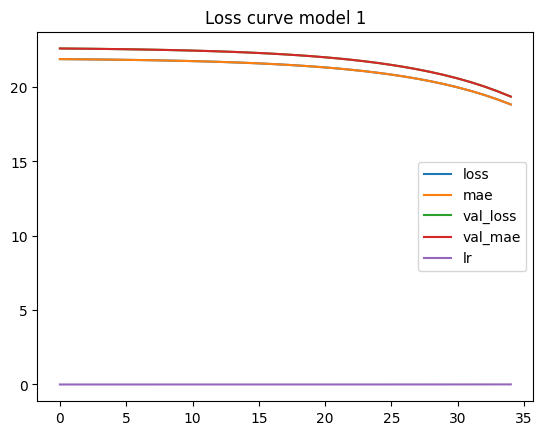

In [11]:
# checkout the history

pd.DataFrame(history_1.history).plot()
plt.title("Loss curve model 1")

As we can visualize, the model is too basic to learn any pattern from the data

In [12]:
model_1.evaluate(test_data_scaled, test_targets)

4/4 [==============================] - 0s 7ms/step - loss: 18.9101 - mae: 18.9101


[18.91006088256836, 18.91006088256836]

We used the Mean Absolute Error as our metric and the result shows that on the average we deviate by 20 from the original value

#### Model 2

In [13]:
# set random seed
tf.random.set_seed(42)

# build the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"), # added an additional layer with 100 neurons with relu activation function
    tf.keras.layers.Dense(1)
])


# Compile the model

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
# learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4 * 10 **(epochs/20))

# fit the 2odel

history_2 = model_2 .fit(train_data_scaled,
                         train_targets,
                         epochs=30,
                         verbose=1,
                         callbacks=[lr_scheduler],
                         validation_split=0.1)

Epoch 1/30
12/12 [==============================] - 3s 102ms/step - loss: 22.3869 - mae: 22.3869 - val_loss: 23.0250 - val_mae: 23.0250 - lr: 1.0000e-04
Epoch 2/30
12/12 [==============================] - 0s 20ms/step - loss: 22.3173 - mae: 22.3173 - val_loss: 22.9510 - val_mae: 22.9510 - lr: 1.1220e-04
Epoch 3/30
12/12 [==============================] - 0s 29ms/step - loss: 22.2387 - mae: 22.2387 - val_loss: 22.8678 - val_mae: 22.8678 - lr: 1.2589e-04
Epoch 4/30
12/12 [==============================] - 0s 36ms/step - loss: 22.1508 - mae: 22.1508 - val_loss: 22.7731 - val_mae: 22.7731 - lr: 1.4125e-04
Epoch 5/30
12/12 [==============================] - 0s 30ms/step - loss: 22.0501 - mae: 22.0501 - val_loss: 22.6649 - val_mae: 22.6649 - lr: 1.5849e-04
Epoch 6/30
12/12 [==============================] - 0s 27ms/step - loss: 21.9355 - mae: 21.9355 - val_loss: 22.5405 - val_mae: 22.5405 - lr: 1.7783e-04
Epoch 7/30
12/12 [==============================] - 0s 32ms/step - loss: 21.8031 - mae:

In [14]:
model_2.evaluate(test_data_scaled, test_targets)

4/4 [==============================] - 0s 8ms/step - loss: 5.6636 - mae: 5.6636


[5.663602828979492, 5.663602828979492]

Text(0.5, 1.0, 'Loss curve model 1')

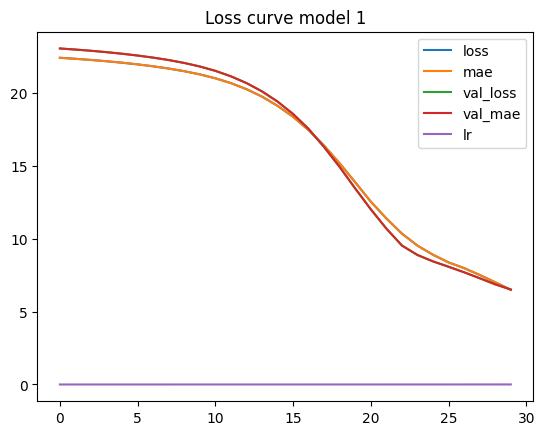

In [15]:
# checkout the history

pd.DataFrame(history_2.history).plot()
plt.title("Loss curve model 1")

Text(0.5, 1.0, 'Learning rate vs Loss')

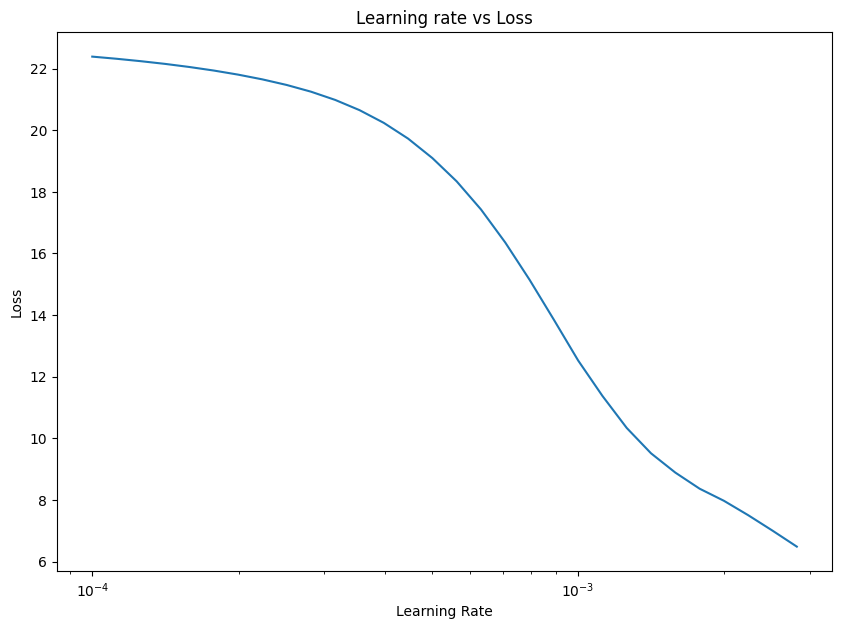

In [16]:
# plot the learning rate vs the loss

lrs = 1e-4 * (10 **(tf.range(30)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_2.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

#### Model 3

In [17]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])


# Compile the model

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002), # set the learning rate to 0.0002
                metrics=["mae"])


# fit the 2odel

history_3 = model_3.fit(train_data_scaled, train_targets, epochs=100, verbose=0)

In [18]:
# model evaluation
model_3.evaluate(test_data_scaled, test_targets)

4/4 [==============================] - 0s 5ms/step - loss: 6.9995 - mae: 6.9995


[6.999511241912842, 6.999511241912842]

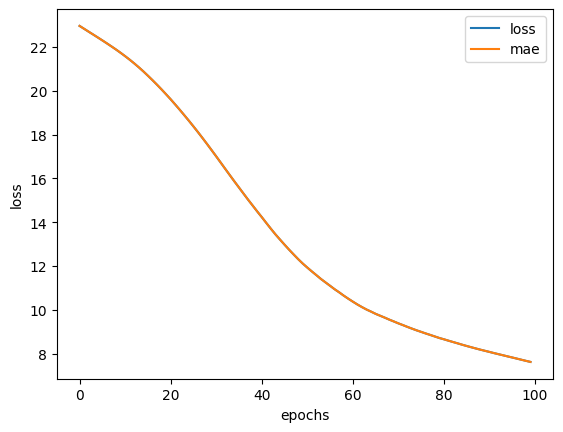

In [19]:
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

#### Model 4

In [20]:
# set random seed
tf.random.set_seed(42)

# build the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu"), # added 2 extra layer and used relu activation function
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear") # used the linear activation function at the output layer
])


# Compile the model

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # set the learning rate to 0.01
                metrics=["mae"])


# fit the Model

history_4 = model_4.fit(train_data_scaled, train_targets, epochs=20, verbose=0)

In [21]:
model_4.evaluate(test_data_scaled, test_targets)

4/4 [==============================] - 0s 9ms/step - loss: 3.1224 - mae: 3.1224


[3.1223976612091064, 3.1223976612091064]

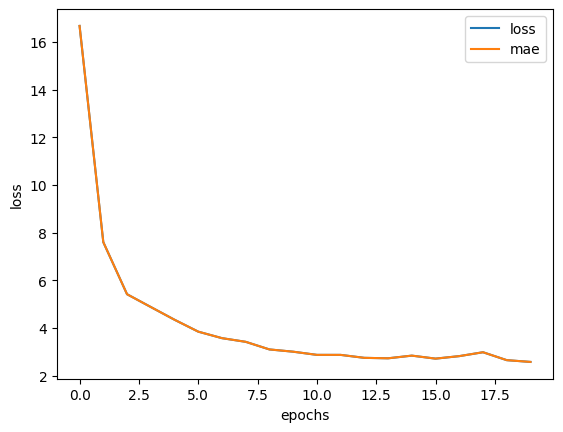

In [22]:
pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [23]:
predictions = model_4.predict(test_data_scaled)

4/4 [==============================] - 0s 4ms/step


In [24]:
test_targets.shape, predictions.shape

((102,), (102, 1))

In [25]:
# squeezing the pred value so as to get it to same shape with the test_target

predictions = np.squeeze(predictions)


In [26]:
# putting the pred to a pandas dataframe
predictions_df = pd.DataFrame({'Prediction': predictions, 'Actual': test_targets})

# Display the first few rows of the DataFrame
print(predictions_df)

     Prediction  Actual
0     18.481335    22.4
1     25.732924    28.6
2     17.568354    19.5
3     23.241873    24.8
4     17.774061    24.5
..          ...     ...
97    15.029837    19.5
98    17.992500    21.1
99    24.139790    24.5
100   11.864011    13.4
101   13.950782    18.6

[102 rows x 2 columns]


In [27]:
# adding the Residual column which is the difference between the predicted and actual values
predictions_df["Residual"] = predictions_df["Prediction"] - predictions_df["Actual"]

predictions_df.head()

,Prediction,Actual,Residual
0,18.481335,22.4,-3.918665
1,25.732924,28.6,-2.867076
2,17.568354,19.5,-1.931646
3,23.241873,24.8,-1.558127
4,17.774061,24.5,-6.725939


In [28]:
# adding a differnce column that we tell the difference in percentage

predictions_df["Difference %"] = np.absolute(predictions_df["Residual"] / predictions_df["Actual"] * 100)

predictions_df

,Prediction,Actual,Residual,Difference %
0,18.481335,22.4,-3.918665,17.494042
1,25.732924,28.6,-2.867076,10.024743
2,17.568354,19.5,-1.931646,9.905879
3,23.241873,24.8,-1.558127,6.282771
4,17.774061,24.5,-6.725939,27.452811
...,...,...,...,...
97,15.029837,19.5,-4.470163,22.923915
98,17.992500,21.1,-3.107500,14.727487
99,24.139790,24.5,-0.360210,1.470247
100,11.864011,13.4,-1.535989,11.462606


In [29]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
predictions_df.sort_values(by=['Difference %']) # sorting

,Prediction,Actual,Residual,Difference %
21,14.93,14.90,0.03,0.18
73,15.37,15.40,-0.03,0.18
92,20.26,20.30,-0.04,0.19
37,36.27,36.50,-0.23,0.62
69,21.42,21.60,-0.18,0.82
...,...,...,...,...
77,9.37,16.30,-6.93,42.49
90,10.66,23.70,-13.04,55.04
86,19.86,50.00,-30.14,60.28
93,19.45,11.90,7.55,63.47


In [30]:
predictions_df.describe()

,Prediction,Actual,Residual,Difference %
count,102.00,102.00,102.00,102.00
mean,20.41,22.64,-2.23,14.23
std,7.23,8.48,4.42,14.98
min,9.35,7.20,-30.14,0.18
25%,15.84,18.92,-3.34,5.27
50%,19.29,21.40,-1.86,9.66
75%,24.28,24.65,-0.27,17.30
max,52.06,50.00,7.55,96.37


With the pandas describe method we can see that the prediction has a mean of 20.4 with an standard devaition of 7.23 and the Actual value (test_targets) has a mean of 22 with std of 8 , Model 4 was choosen because it performes best